In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE

In [8]:
data = pd.read_csv('weather_dataset.csv')
print(data.head(10))

   temp  rhum    pres  coco  year  month  day  hour        city  longitude  \
0  21.7  28.0  1016.0   2.0  2020      1    1     0  Tijuana_MX  -117.0382   
1  14.4  57.0  1016.7   2.0  2020      1    1     1  Tijuana_MX  -117.0382   
2  15.0  55.0  1017.3   2.0  2020      1    1     2  Tijuana_MX  -117.0382   
3  13.9  59.0  1017.7   2.0  2020      1    1     3  Tijuana_MX  -117.0382   
4  13.3  47.0  1018.0   2.0  2020      1    1     4  Tijuana_MX  -117.0382   
5  12.2  47.0  1018.7   2.0  2020      1    1     5  Tijuana_MX  -117.0382   
6  11.1  50.0  1019.0   2.0  2020      1    1     6  Tijuana_MX  -117.0382   
7  11.1  50.0  1019.0   1.0  2020      1    1     7  Tijuana_MX  -117.0382   
8  11.7  44.0  1019.0   1.0  2020      1    1     8  Tijuana_MX  -117.0382   
9   7.2  65.0  1018.7   7.0  2020      1    1     9  Tijuana_MX  -117.0382   

   latitude weather_label  
0   32.5149         Clear  
1   32.5149         Clear  
2   32.5149         Clear  
3   32.5149         Clear  
4

In [9]:
digit_data = data.select_dtypes(include=[np.number])
print(digit_data.describe())

                temp           rhum           pres           coco  \
count  348106.000000  348106.000000  348106.000000  348106.000000   
mean       15.711969      73.014286    1013.961760       4.346665   
std         9.255788      18.315993       8.927447       4.663986   
min       -24.800000       2.000000     902.100000       1.000000   
25%         9.200000      62.000000    1009.500000       2.000000   
50%        16.200000      77.000000    1014.200000       3.000000   
75%        22.600000      87.000000    1019.100000       4.000000   
max        44.000000     100.000000    1050.100000      27.000000   

                year          month            day           hour  \
count  348106.000000  348106.000000  348106.000000  348106.000000   
mean     2021.496378       6.529077      15.792043      11.497958   
std         1.121222       3.458899       8.797612       6.922114   
min      2020.000000       1.000000       1.000000       0.000000   
25%      2020.000000       4.0000

Text(0.5, 1.0, 'Correlation Matrix of Weather Dataset')

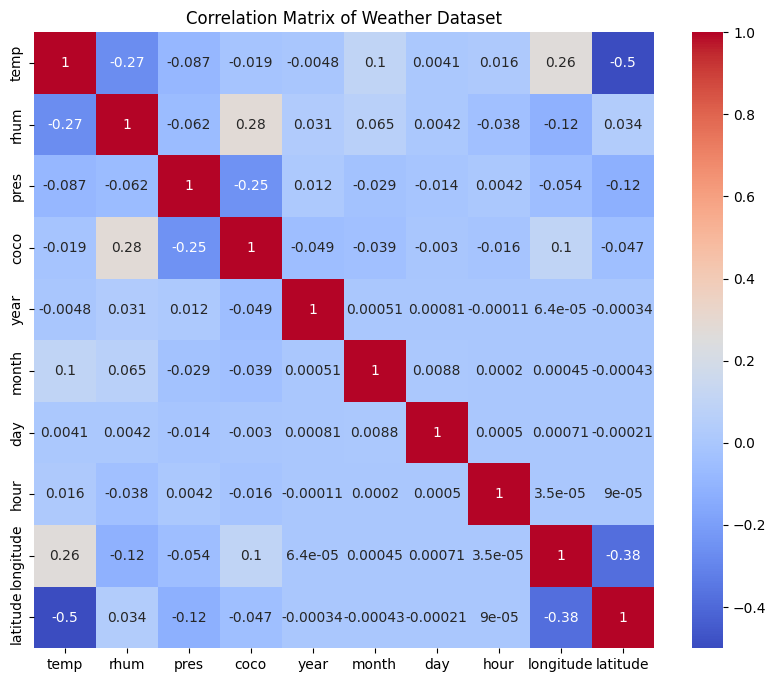

In [10]:
corr = digit_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Dataset')

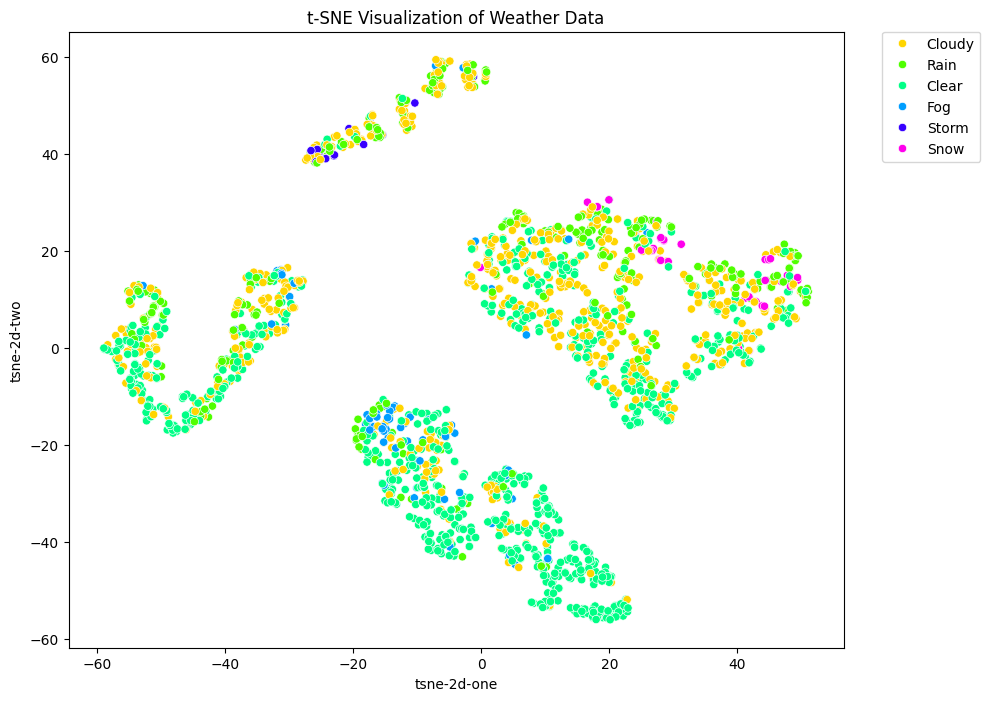

In [11]:
data_sampled = data.sample(n=2000, random_state=42)

features = ['temp', 'rhum', 'pres', 'latitude', 'month']
X = data_sampled[features]

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

data_sampled['tsne-2d-one'] = X_embedded[:, 0]
data_sampled['tsne-2d-two'] = X_embedded[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='weather_label',
    palette=sns.color_palette('hsv', len(data['weather_label'].unique())),
    data=data_sampled
)
plt.title('t-SNE Visualization of Weather Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

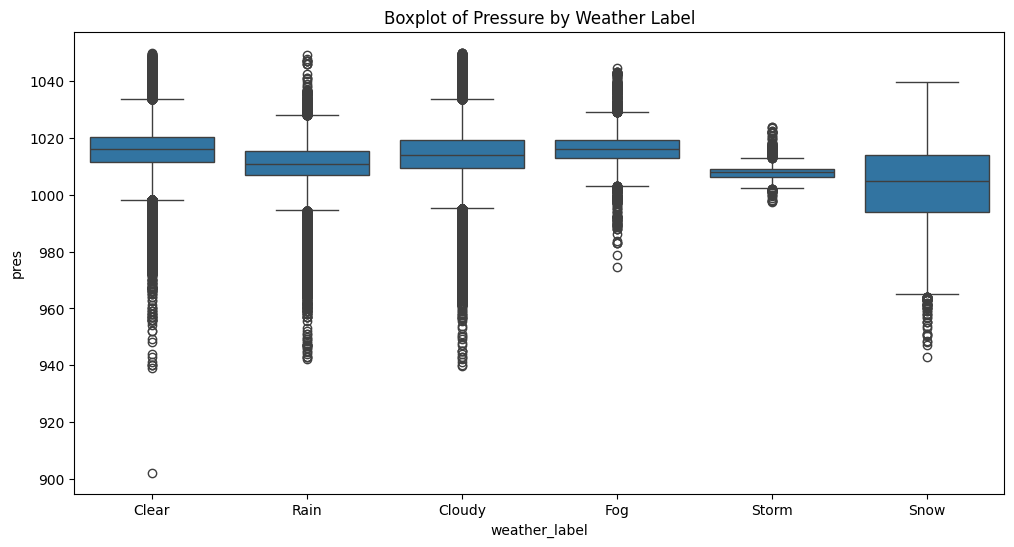

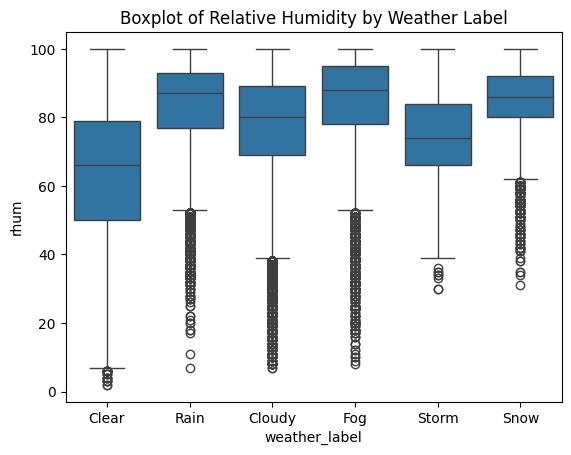

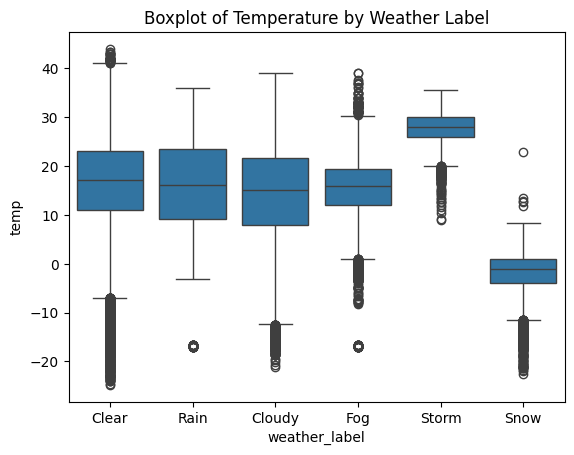

In [12]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='weather_label', y='pres', data=data)
plt.title('Boxplot of Pressure by Weather Label')
plt.show()

sns.boxplot(x='weather_label', y='rhum', data=data)
plt.title('Boxplot of Relative Humidity by Weather Label')
plt.show()

sns.boxplot(x='weather_label', y='temp', data=data)
plt.title('Boxplot of Temperature by Weather Label')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Preparar datos
le = LabelEncoder()
y = le.fit_transform(data['weather_label']) # Convertir texto a números
X = data[['temp', 'rhum', 'pres', 'latitude', 'longitude', 'month', 'hour']]

# Entrenar modelo rápido
model = RandomForestClassifier()
model.fit(X, y)

# Graficar importancia
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importances from Random Forest Classifier')
plt.show()